### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2022 Semester 1

## Assignment 1: Naive Bayes Leaner for Adult Database


**Student Name(s):** Aobo Li
<br>
**Student ID(s):** 1172339



Marking will be applied on the four functions that are defined in this notebook, and to your responses to the questions at the end of this notebook.

## General info

<b>Due date</b>: Friday, 8 April 2022 5pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: This iPython notebook is a template which you will use for your Assignment 1 submission. You need to only submitted the completed copy of this iPython notebook.

<b>Late submissions</b>: -10% per day up to 5 days (both weekdays and weekends count). Submissions more than 5 days late will not be accepted (resul in a mark of 0).
<ul>
    <li>one day late, -1.0;</li>
    <li>two days late, -2.0;</li>
    <li>three days late, -3.0;</li>
    <li>four days late, -4.0;</li>
    <li>five days late, -5.0;</li>
</ul>

<b>Extensions</b>: Students who are demonstrably unable to submit a full solution in time due to medical reasons or other trauma, may apply for an extension.  In these cases, you should email <a href="mailto:ni.ding@unimelb.edu.au">Ni Ding</a> as soon as possible after those circumstances arise. If you attend a GP or other health care service as a result of illness, be sure to provide a Health Professional Report (HPR) form (get it from the Special Consideration section of the Student Portal), you will need this form to be filled out if your illness develops into something that later requires a Special Consideration application to be lodged. You should scan the HPR form and send it with the extension requests.

<b>Marks</b>: This assignment will be marked out of 20, and make up 20% of your overall mark for this subject.

<b>Materials</b>: Use Jupyter Notebook and Python page on Canvas for information on the basic setup required for this class, including an iPython notebook viewer and the python packages NLTK, Numpy, Scipy, Matplotlib, Scikit-Learn. You can use any Python built-in packages, but do not use any other 3rd party packages; if your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  


<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should edit the sections below where requested, but leave the rest of the code as is. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 

You will be marked not only on the correctness of your methods, but also the quality and efficency of your code: in particular, you should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it. We reserve the right to deduct up to 2 marks for unreadable or exessively inefficient code.

8 of the marks available for this Project will be assigned to whether the five specified Python functions work in a manner consistent with the materials from COMP90049. Any other implementation will not be directly assessed (except insofar as it is required to make these five functions work correctly).

12 of the marks will be assigned to your responses to the questions, in terms of both accuracy and insightfulness. We will be looking for evidence that you have an implementation that allows you to explore the problem, but also that you have thought deeply about the data and the behaviour of the Naive Bayes classifier.

<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on the discussion board (ED -> Assignments -> A1); we recommend you check it regularly.

<b>Academic misconduct</b>: For most people, collaboration will form a natural part of the undertaking of this homework, and we encourge you to discuss it in general terms with other students. However, this ultimately is still an individual task, and so reuse of code or other instances of clear influence will be considered cheating. Please check the <a href="https://canvas.lms.unimelb.edu.au/courses/124196/modules#module_662096">CIS Academic Honesty training</a> for more information. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

**IMPORTANT**

Please carefully read and fill out the <b>Authorship Declaration</b> form at the bottom of the page. Failure to fill out this form results in the following deductions: 
<UL TYPE=”square”>
<LI>missing Authorship Declaration at the bottom of the page, -5.0
<LI>incomplete or unsigned Authorship Declaration at the bottom of the page, -3.0
</UL>
**NOTE: COMPLETE AND SUBMIT THIS FILE. YOU SHOULD IMPLEMENT FOUR FUNCTIONS AND INCLUDE YOUR ANSWERS TO THE QUESTIONS IN THIS FILE ONLY. NO OTHER SUBMISSION IS REQUIRED.**

**Keep your code clean. Adding proper comments to your code is MANDATORY.**

## Part 1: Base code [8 marks]

Instructions
1. Do **not** shuffle the data set
2. Treat the attributes as they are(e.g., do **not** convert numeric attributes to categorical or categorical to numeric). Implement a Naive Bayes classifier with appropriate likelihood function for each attribute.
3. You should implement the Naive Bayes classifier from scratch. Do **not** use existing implementations/learning algorithms.
4. You CONNOT have more than one train or predict function. Both continuous numeric attributes and categorical ones should be trained in one `train()` function, similarly for the `predict()`.  
5. Apart from the instructions in point 3, you may use libraries to help you with data reading, representation, maths or evaluation
6. Ensure that all and only required information is printed, as indicated in the final three code cells. Failure to adhere to print the required information will result in **[-1 mark]** per case. *(We don't mind details like you print a list or several numbers -- just make sure the information is displayed so that it's easily accessible)
7. You may change the prototypes of these functions, and you may write other functions, according to your requirements. We would appreciate it if the required functions were prominent/easy to find. 
8. You should add adecuate comments to make your code easily comprehendible.*

In [1]:
# This function should prepare the data by reading it from a file and converting it into a useful format for training and testing
# and implement 90-10 splitting as specified in the project description.

# import tain test split form sklearn to split attributes and label into training and testing group
def preprocess(filename, train_size):
    # create empty list to store x - instances, and y - labels
    x = []
    y = []
    # read the file in the same folder as this file, 
    with open(filename, mode='r') as f:
        for line in f:
            # split each line of data by , for better format
            atts = line.strip().split(",")
            x.append(atts[0:-1]) # all atts, excluding the label
            y.append(atts[-1])   # contains only labels
    # get all heading of the csv file
    all_class = x[0]
    # exclude heading from attributes and labels 
    x_value = x[1:]
    y_value = y[1:]
    num_of_train_data = int(len(x)*train_size)

    
    # split attributes and labels into 90:10 training and testing group, name them x_train.....
    # x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,train_size=0.9, shuffle=False)
    x_train = x_value[:num_of_train_data]
    y_train = y_value[:num_of_train_data]
    x_test = x_value[num_of_train_data:]
    y_test = y_value[num_of_train_data:]

    # return variables
    return x_train, x_test, y_train, y_test, all_class, x_value, y_value




In [2]:
# This function should calculat prior probabilities and likelihoods (conditional probabilities) from the training data and using
# to build a naive Bayes model

import pandas as pd
import math
import numpy as np
# define function that retrives nominal data
def obtain_nominal_variable(numeric,attribute_list, all_class):
    temp_list = []
     # column 1 4 and 10 are numeric values, do not contain in nominal variables
    for i in range(len(all_class)):
        if i in numeric:
            # column is numeric, focus only on nominal data
            continue
        else:
            # create list of variable in that column
            a = []
            # obtain all variable in that attribute column
            for j in range(len(attribute_list)):
                a.append(attribute_list[j][i])
            # set the list to get one instance of each, then convert to list to append to variable
            temp_list.append(list(set(a)))
    return temp_list


# define function that retrives numeric data
def obtain_numeric_variable(numeric,concept_list):
    temp_list = []
    # column 1 4 and 10 are numeric values, do not contain in nominal variables
    for i in range(0,11):
        if i in numeric:
            b = []
            for j in range(len(concept_list)):
                # convert all value into int rather than string for future processes
                b.append(int(concept_list[j][i]))
            temp_list.append(b)
    return temp_list



# define function that counts occurence of variable in an attribute 
def count_variable(nominal,variable_list,count_list):
    all_dict={}
    # go through all class(heading), each heading is a dictionary containing counts of variables
    for column_num in range(len(nominal)):
        # create temperary dictionary for each heading
        temp_dict = {}
        
        # go through set variable of x_train, count occurrance in less_50k dataframe, nominal column, 
        # dict keys are all_variable[i][j], len(all_variable[i]) is the number of variable in that heading
        for variable_num in range(len(variable_list[column_num])):
            # count the first occurence
            count = count_list[nominal[column_num]].value_counts()
            num = count[variable_list[column_num][variable_num]]
            temp_dict[variable_list[column_num][variable_num]] = int(num)
        # append this variable count for one heading to less or equal than 50k salary dictionary
        all_dict[all_class[nominal[column_num]]] = temp_dict
    
    return all_dict


# define function that adds all variable in attributes even with 0 count
def add_all_var_count(all_variable,dictionary,all_class, nominal):
    # go through 2d list of variable, attribute[variable]
    for i in range(len(all_variable)):
        # go through variable in that specific attribute
        for j in range(len(all_variable[i])):
            # if key is not fount in dictionary, then add this key in with count of 0
            if all_variable[i][j] not in dictionary[all_class[nominal[i]]]:
                dictionary[all_class[nominal[i]]][all_variable[i][j]] = 0
    # return new dictionary with 0 count of variables
    return dictionary

    
# calculate numeric estimators, mean, standard deviations for future gaussian distribution calculation
def numeric_estimator(numeric_data, all_class, numeric):
    #create a dictionary to store mean and standard deviation for all numeric attribute
    dictionary = {}
    # go through all three numeric attribute
    for i in range(len(numeric_data)):
        # create a temperary dictionary to store mean and sd for each attribute
        temp = {}
        # get sum of one attribute and instance to find mean
        a = 0
        # b is number of instance
        n = 0
        # get the sum of all numeric data, run a if line to check if there are missing values
        for j in range(len(numeric_data[i])):
            if type(numeric_data[i][j])==int:
                a+=numeric_data[i][j]
                n+=1
        if n == 0:
            break
        mean = a/n
        # s is sum of square of  (xi - mean)
        s = 0
        temp['mean'] = mean
        for j in range(n):
            s+=(numeric_data[i][j]-mean)**2
        # unbiased estimator of variance requires n-1 
        sd = (s/(n-1))**(1/2)
        temp['sd'] = sd
        # allocate attribute name with it's mean and variance
        dictionary[all_class[numeric[i]]] = temp
    return dictionary
    
    
def laplace_smooth(data_type, all_class, all_variable, dictionary):
    # apply laplace smoothing, run through all variable count in an attribute, if one variable in an attribute
    # has a count of 0, all variables in that attribute will add 1, if not, continue
    for i in range(len(data_type)):
        cls = all_class[data_type[i]]
        # check represents if variable equals to 0, 1 is none, 0 is at least 1
        for j in range(len(dictionary[cls])):
            variable = all_variable[i][j]
            dictionary[cls][variable]+=1
    return dictionary

 
# define function that calculates probability of variable in an attribute after smoothing
def calc_prob(nominal,all_class,all_variable,x_train,count_of_calculate_variable,
              count_of_assist_variable):
    # create a new dictionary to hold probabilities
    dictionary_of_prob = {}
    # go through all nominal count
    for i in range(len(nominal)):
        # create temperary dict to store all variable probability for one attribute
        temp_dict = {}
        # let a be attribute that is going to go through
        a = all_class[nominal[i]]
        # let b be variable of this attribute
        b = all_variable[i]
        # go through all values in attribute heading
        num_of_instance = 0
        for j in range(len(count_of_calculate_variable[a])):
            num_of_instance += count_of_calculate_variable[a][b[j]]
        for j in range(len(count_of_calculate_variable[a])):
            
            # let c be num of instance of variable
            c = count_of_calculate_variable[a][b[j]]
            
            # d be num of instance of other count of variable
            d = count_of_assist_variable[a][b[j]]
            
            # f be probability of attribute
            f = (c+d)/(num_of_instance)
            
            # since all variable need to devide by prior, it doesn't matter if
            # prior is devided in conditional probability
            prob = (c/(c+d))*f
            
            temp_dict[b[j]]=prob
        dictionary_of_prob[a]=temp_dict
    return dictionary_of_prob


def train(x_train, x_test, y_train, y_test, all_class):
    # get the overall probability of <=50k and >50k
    concept = list(set(y_train))
    if '<' in concept[0]:
        less = str(concept[0])
        more = str(concept[1])
    else:
        less = str(concept[1])
        more = str(concept[0])

    priorless = y_train.count(less)/len(y_train)
                                  
    priormore = 1 - priorless

    # now attribute values are obtained, create two dictionary of <=50 and >50 values, along with count of each variable
    less_than_50k=[]
    more_than_50k=[]
    # go through all training data, seperate into two groups
    for i in range(len(x_train)):
        if y_train[i] == less:
            less_than_50k.append(x_train[i])
        else:
            more_than_50k.append(x_train[i])
            
    #convert into data frame so column count is easier
    less_50k = pd.DataFrame.from_records(less_than_50k)
    more_50k = pd.DataFrame.from_records(more_than_50k)
    
    # create list that indicates numeric column number 
    numeric = []
    nominal = []
    example_instance = []
    for i in range(1,len(x_train)):
        if x_train[i].count("?") == 0:
            example_instance.append(x_train[i])
            break

    for i in range(len(example_instance[0])):
        if example_instance[0][i].isdigit():
            numeric.append(i)
        else:
            nominal.append(i)

    # get all attribute variable from training data for two dataframe and the whole training set
    all_variable =obtain_nominal_variable(numeric,x_train, all_class)
    variable_less_50k= obtain_nominal_variable(numeric,less_than_50k, all_class)
    variable_more_50k= obtain_nominal_variable(numeric,more_than_50k, all_class)
    
    # now convert dataframe into dictionary with counts of each column's variable and it's count
    dict_less_50k = count_variable(nominal,variable_less_50k,less_50k)
    dict_more_50k = count_variable(nominal,variable_more_50k,more_50k)
    
    
    # for variables that is not in keys of dict, add those variable into dictionary with count 0
    count_less_50k = add_all_var_count(all_variable, dict_less_50k, all_class, nominal)
    count_more_50k = add_all_var_count(all_variable, dict_more_50k, all_class, nominal)

    
    # it might be possible that <=50K or >50K do not have attribute variables that exist in the other,
    # run through all variable in training set, then smoothing the count of data by laplace so probability is
    # easier to obtain later
    count_less_50k = laplace_smooth(nominal, all_class, all_variable, count_less_50k)
    count_more_50k = laplace_smooth(nominal, all_class, all_variable, count_more_50k)


    # obtain numeric data and its mean and variance
    numeric_less_50k = obtain_numeric_variable(numeric,less_than_50k)
    numeric_more_50k = obtain_numeric_variable(numeric,more_than_50k)
    # obtain mean and variance of numeric data for gaussian pdf
    numeric_more_50k_estimator = numeric_estimator(numeric_more_50k, all_class, numeric)   
    numeric_less_50k_estimator = numeric_estimator(numeric_less_50k, all_class, numeric)
    
    # compute conditional probability, get number of instance in each concept, <=50k and >50k
    
    # p(c|x) = p(x|c)p(c) / p(x) ||| p(attribute|>50k) = p(>50k|attribute)*p(attribute)/p(>50k)
    # p attribute = count attribute / total number of instance
    
    prob_less_50k = calc_prob(nominal,all_class,all_variable,x_train,count_less_50k,
              count_more_50k)
    prob_more_50k = calc_prob(nominal,all_class,all_variable,x_train,count_more_50k,
              count_less_50k)
    

    # return the needed information for prediction
    return prob_less_50k, prob_more_50k, numeric_more_50k_estimator, numeric_less_50k_estimator, priorless, numeric_less_50k, numeric_more_50k, less, more



In [51]:
# This function should predict classes for new items in the testing data
import math
import numpy as np
def predict(prob_less_50k, prob_more_50k, numeric_more_50k_estimator, numeric_less_50k_estimator,
           x_test, y_test, all_class, prior,numeric_less_50k, numeric_more_50k, numeric_calculation_type,
           less, more, sd):
    # create list that indicates numeric and nominal column number 
    numeric = []
    nominal = []
    example_instance = []
    # obtain an full instance without missing value
    for i in range(len(x_train)):
        if x_train[i].count("?") == 0:
            example_instance.append(x_train[i])
            break
    # check numeric and nominal column
    for i in range(len(example_instance[0])):
        if example_instance[0][i].isdigit():
            numeric.append(i)
        else:
            nominal.append(i)
    
    
    prediction = []
    probability = []
    # run through the test values
    for i in range (len(x_test)):
        #set probability as 0, since the c hat equals to log of prior + sum of log(conditional probability)
        prob_less = 0
        prob_more = 0
        prob_less += math.log(prior)
        prob_more += math.log((1-prior))
        
        instance = x_test[i]
        # run through test data
        # x_test[i] is one instance of test data

        for j in range(len(instance)):
            # go through all attribute variable of an instance
            # if instance[j] where j is in numeric column number, apply gaussian/KDE pdf probability
            if j in numeric:
                # let attribute name be cls
                cls = all_class[j]
                x = float(instance[j])
                # check which type of numeric calculation is needed
                if numeric_calculation_type == "Gaussian" and '?' not in instance[j]:
                    
                    # go through more than 50k numeric probability (Gaussian)
                    mean_more = numeric_more_50k_estimator[cls]['mean']
                    sd_more = numeric_more_50k_estimator[cls]['sd']
                    p_more = 1/(sd_more*math.sqrt(2*np.pi))*np.exp(-0.5*((x-mean_more)/sd_more)**2)
                    prob_more += math.log(p_more)
                    
                    # go through less than 50k numeric probability (Gaussian)
                    mean_less = numeric_less_50k_estimator[cls]['mean']
                    sd_less = numeric_less_50k_estimator[cls]['sd']
                    p_less = 1/(sd_less*math.sqrt(2*np.pi))*np.exp(-0.5*((x-mean_less)/sd_less)**2)
                    prob_less += math.log(p_less)
                    
                
                elif numeric_calculation_type == "KDE" and '?' not in instance[j]:
                    # set mean and sd as 0 and 3
                    mean = 0
                    # kde_less and more is the sum of gaussian with x-xi
                    kde_less = 0
                    kde_more = 0
                    # KDE = prior * 1/N * sum of gaussian * (x - xi), obtain 
                    # get list of that attribute in training
                    train_less = numeric_less_50k[numeric.index(j)]
                    train_more = numeric_more_50k[numeric.index(j)]
                    # go through KDE sum process
                    for k in range(len(train_less)):
                        kde_less += 1/(sd*math.sqrt(2*np.pi))*np.exp(-0.5*((x-train_less[k])/sd)**2)
                    for k in range(len(train_more)):
                        kde_more += 1/(sd*math.sqrt(2*np.pi))*np.exp(-0.5*((x-train_more[k])/sd)**2)
                    
                    # finalise KDE probability calculation
                    kde_less_prob = math.log(kde_less/len(train_less))
                    kde_more_prob = math.log(kde_more/len(train_more))
                    # probability will need to be in log form, as the product of all the probabilityies might 
                    # be too small for the computer to obtain
                    prob_less += kde_less_prob
                    prob_more += kde_more_prob
                
                else:
                    # in case calculation type is wrong, terminate the program, provide avaliable calculation type
                    print("Wrong Calculation type, only accept Gaussian/KDE")
                    exit()
                
            # nominal data
            else:
                attribute = all_class[j]
                variable = x_test[i][j]
                # check if variable in test data is a key in probability dictionary, if it does not exist in
                # the dictionary, ignore this attribute instance
                if prob_more_50k[attribute].get(variable) and prob_less_50k[attribute].get(variable)is not None:
                    # probability will need to be in log form, as the product of all the probabilityies might 
                    # be too small for the computer to obtain
                    prob_more += math.log(prob_more_50k[attribute].get(variable))
                    prob_less += math.log(prob_less_50k[attribute].get(variable))
        
        # predict concept, the larger one is more possible
        if prob_less > prob_more:
            prediction.append(less)
            probability.append([prob_less, prob_more])
        else:
            prediction.append(more)
            probability.append([prob_less, prob_more])
    
    # return the list of predicted concepts and it's probability
    return prediction, probability


In [8]:
# This function should evaliate the prediction performance by comparing your model’s class outputs to ground
# truth labels, return and output accuracy, confusion matrix and F1 score.

def evaluate(prediction, y_test, less, more):
    # <=50K is positive, >50K is negative
    total = len(prediction)
    # True positive, prediction <=50K, test<=50K
    TP = 0
    # true negative, prediction >50K, test >50k
    TN = 0
    # false positive, prediction >50k, test <=50k
    FP =0
    # false negative, prediction <=50k, test >50k
    FN = 0
    for i in range(total):
        if prediction[i] == y_test[i] == less:
            TP+=1
        if prediction[i] == y_test[i] == more:
            TN+=1
        if prediction[i] == less and y_test[i] == more:
            FP+=1
        if prediction[i] == more and y_test[i] == less:
            FN+=1
    
    
    accuracy = (TP+TN)/total
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f_score = (2*precision*recall)/(precision+recall)
    print("The accuracy of the prediction is: ", accuracy*100, "%")
    # Now print out the confusion matrix
    print("confusion matrix")
    print("\t\tprediction")
    print("\tpositive\tnegative\n")
    print("positive  ", TP, "\t\t", FN, "\n")
    print("negative  ", FP, "\t\t", TN, "\n")
    print("The F1 score of the prediction is: ", f_score, '\n\n\n')
    
    return accuracy, precision, recall, f_score, TP, FN, FP, TN


In [61]:
# This cell should act as your "main" function where you call the above functions 
# on the full ADULT data set, and print the evaluation score. [0.33 marks]


# First, read in the data and apply your NB model to the OBJECTIVITY data
# change the file name if needed, default as "adult.csv"
x_train, x_test, y_train, y_test, all_class, x, y= preprocess("adult.csv", 0.9)
# get the classes of the concept
concept = list(set(y_train))


# now train the data using train function, which returns probability for less
# and more than 40k data, numeric column list, its mean and sd and prior of the data
prob_less_50k, prob_more_50k, numeric_more_50k_estimator, numeric_less_50k_estimator, priorless, numeric_less_50k, numeric_more_50k, less, more= train(
    x_train, x_test, y_train, y_test, all_class)


# get the prediction of test data via prediction function
prediction, probability = predict(prob_less_50k, prob_more_50k, numeric_more_50k_estimator, numeric_less_50k_estimator,
           x_test, y_test, all_class, priorless,numeric_less_50k, numeric_more_50k, "Gaussian", less, more, None)


# Second, print the full evaluation results from the evaluate() function
accuracy, precision, recall, f_score, TP, FN, FP, TN = evaluate(prediction, y_test, less, more)



# Third, print data statistics and model predictions, as instructed below 
# N is the total number of instances, F the total number of features, L the total number of labels
# The "class probabilities" may be unnormalized
# The "predicted class ID" must be in range (0, L)

print("Feature vectors of instances [0, 1, 2]: ", "\n",x_train[0],"\n",x_train[1],"\n",x_train[2])

print("\n\n\nNumber of instances (N): ", len(x_train)+len(x_test))
print("Number of features (F): ", len(all_class))
print("Number of labels (L): ", len(concept))


# probability is the sum of logs, as it may be too small to obtain by the coomputer, take 15 places after
# decimal point

print("\nPredicted class probabilities for instance N-3: ","{ <=50k: %.15f, " %probability[-3][0],
     ">50k: %.15f }" %probability[-3][1])
print("Predicted class ID for instance N-3: ", prediction[-3])
print("\nPredicted class probabilities for instance N-2: ", "{ <=50k: %.15f, " %probability[-2][0],
     ">50k: %.15f }" %probability[-2][1])
print("Predicted class ID for instance N-2: ", prediction[-2])
print("\nPredicted class probabilities for instance N-1: ", "{ <=50k: %.15f, " %probability[-1][0],
     ">50k: %.15f }" %probability[-1][1])
print("Predicted class ID for instance N-1: ", prediction[-1])



The accuracy of the prediction is:  86.0 %
confusion matrix
		prediction
	positive	negative

positive   69 		 8 

negative   6 		 17 

The F1 score of the prediction is:  0.9078947368421053 



Feature vectors of instances [0, 1, 2]:  
 ['68', ' ?', ' 1st-4th', '2', ' Divorced', ' ?', ' Not-in-family', ' White', ' Female', '20', ' United-States'] 
 ['39', ' State-gov', ' Bachelors', '13', ' Never-married', ' Adm-clerical', ' Not-in-family', ' White', ' Male', '40', ' United-States'] 
 ['50', ' Self-emp-not-inc', ' Bachelors', '13', ' Married-civ-spouse', ' Exec-managerial', ' Husband', ' White', ' Male', '13', ' United-States']



Number of instances (N):  1000
Number of features (F):  11
Number of labels (L):  2

Predicted class probabilities for instance N-3:  { <=50k: -20.768165488458912,  >50k: -19.762177925498445 }
Predicted class ID for instance N-3:   >50K

Predicted class probabilities for instance N-2:  { <=50k: -25.310387321914636,  >50k: -22.803496285083625 }
Predicted class

## Part 2: Conceptual questions [8 marks for groups of 1] / [16 marks for groups of 2]


If you are in a group of 1, you should respond to Q1 and Q2.

If you are in a group of 2, you should respond to Q1, Q2, Q3 and Q4.

A response to a question should take about 100–250 words. You may need to develope codes or functions to help respond to the question here. 

#### NOTE: We strongly recommend <u>including figures or tables, etc.</u> to support your responses. The figures and tables inserted in Markdown cells must be reproducable by your code.

### Q1 [4 marks]
<u>Sensitivity</u> and <u>specificity</u> are two model evaluation metrics.  A good model should have both sensitivity and specificity high. Use the $2 \times 2$ confusion matrix returned by `evaluate()` to calculate the sensitivity and specificity. Do you see a difference between them? If so, what causes this difference? Provide suggestions to improve the model performance. 

In [62]:
# Write additional code here, if necessary (you may insert additional code cells)
# sensitivity = TP/(TP+FN)
# specificity = TN/(TN+FP)

print("Sensitivity of the first test is: ", 69/(69+8))
print("Specificity of the first test is: ", 17/(17+6))
print("Number of <=50K data in training: ", len(numeric_less_50k[0]))
print("Number of >50K data in training:  ", len(numeric_more_50k[0]))

Sensitivity of the first test is:  0.8961038961038961
Specificity of the first test is:  0.7391304347826086
Number of <=50K data in training:  692
Number of >50K data in training:   208


Sensitivity of the test is much higher than specificity, which suggests that this model can obtain high proportion of True positives cases, but also obtain more False positive cases, fewer false >50k is detected when the actural concept is <=50k. The main reason for this difference could be because the model is obtained through an unbalanced dataset, that it dies not have enough information for >50K prediction, as it only obtains 208 instances in training, very little comparing to 692 instance of <=50K data in training. It may also be caused by the missing value in training data, where I have used missing data as a new category of attribute variable to calculate the probability, reduced the true probability of >50k data. 

To solve this problem, more >50K data is needed in training, however, considering that the total number of >50k data is significantly less than <=50k, this approach may not be effective. One possible way is to classify dataset into <= and >50k first, then take 95% of the two group for training, the remaining 5% as testing. This approach might slightly increase specificity.

Another way to solve this problem is to create a sub-dataset with even instance of classes, so that prior does not have influence on attribute's prediction. But the problem for this approach is that, prior may reflect the population and not considering it might decrease accuracy of the model.



### Q2 [4 marks]
You can adopt different methods for training and/or testing, which will produce different results in model evaluation. 

(a) Instead of Gaussian, <u>implement KDE</u> for  $P(X_i|c_j)$ for numeric attributes $X_i$. Compare the evaluation results with Gaussian. Which one do you think is more suitable to model $P(X_i|c_j)$, Gaussian or KDE? Observe all numeric attributes and justify your answer.

You can choose an arbitrary value for kernel bandwidth $\sigma$ for KDE, but a value between 3 and 15 is recommended. You should write code to implement KDE, not call an existing function/method such as `KernelDensity` from `scikit-learn`.

(b) Implement <u>10-fold and 2-fold cross-validations</u>.  
	Observe the evaluation results in each fold and the average accuracy, recall and specificity over all folds. 
	Comment on what is the effect by changing the values of $m$ in $m$-fold cross validation. (You can choose either Gaussian or KDE Naive Bayes.)

In [63]:
# Write additional code here, if necessary (you may insert additional code cells)
# 2a
# create a list to obtain all kde accuracy with different standard deviation
accuracy_kde= []

sd = 3
# get all accuracy for kde estimation with different standard deviation
for i in range(3,16):
    # KDE is written in predict function, change calculation type into "KDE"
    kde_prediction, kde_probability = predict(prob_less_50k, prob_more_50k, numeric_more_50k_estimator, numeric_less_50k_estimator,
               x_test, y_test, all_class, priorless,numeric_less_50k, numeric_more_50k, "KDE", less, more, sd)
    accuracy_k, precision_k, recall_k, f_score_k, TP_k, FN_k, FP_k, TN_k = evaluate(kde_prediction, y_test, less, more)
    accuracy_kde.append(accuracy_k)
    sd+=1

# obtain only sd 3's kde data

print("\n\nKDE estimation with sd=3 is:")
kde_prediction, kde_probability = predict(prob_less_50k, prob_more_50k, numeric_more_50k_estimator, numeric_less_50k_estimator,
               x_test, y_test, all_class, priorless,numeric_less_50k, numeric_more_50k, "KDE", less, more, 3)
accuracy_k, precision_k, recall_k, f_score_k, TP_k, FN_k, FP_k, TN_k = evaluate(kde_prediction, y_test, less, more)

The accuracy of the prediction is:  85.0 %
confusion matrix
		prediction
	positive	negative

positive   68 		 9 

negative   6 		 17 

The F1 score of the prediction is:  0.9006622516556292 



The accuracy of the prediction is:  84.0 %
confusion matrix
		prediction
	positive	negative

positive   67 		 10 

negative   6 		 17 

The F1 score of the prediction is:  0.8933333333333333 



The accuracy of the prediction is:  82.0 %
confusion matrix
		prediction
	positive	negative

positive   64 		 13 

negative   5 		 18 

The F1 score of the prediction is:  0.8767123287671235 



The accuracy of the prediction is:  82.0 %
confusion matrix
		prediction
	positive	negative

positive   64 		 13 

negative   5 		 18 

The F1 score of the prediction is:  0.8767123287671235 



The accuracy of the prediction is:  82.0 %
confusion matrix
		prediction
	positive	negative

positive   64 		 13 

negative   5 		 18 

The F1 score of the prediction is:  0.8767123287671235 



The accuracy of the predic

In [64]:
# 2b 10-fold cross validation
# j indicates the starting point
j = 0

# create variable that contains sum of estimators, macro-averaging is applied as tests are large enough
total_accuracy_10 = 0
total_specificity_10 = 0
total_fscore_10 = 0
total_sensitivity_10 = 0
total_precision_10 = 0

# create variable that holds the size of fold
fold_size10 = int(len(x)/10)

# split into 10 list for x and y, take first 100, then second 100... as tests, other are training data
# model goes for 10 times, same process as previous training
for i in range(0,10):

    cv_xtest = x[j:j+fold_size10]
    cv_ytest = y[j:j+fold_size10]
    cv_xtrain = x[0:j]+x[j+fold_size10:]
    cv_ytrain = y[0:j]+y[j+fold_size10:]
    
    
    # run through the same training procedures as before, replace train/test with new variable
    prob_less_50k, prob_more_50k, numeric_more_50k_estimator, numeric_less_50k_estimator, priorless, numeric_less_50k, numeric_more_50k, less, more= train(cv_xtrain, 
                                                           cv_xtest, cv_ytrain, cv_ytest, all_class)
    prediction, probability = predict(prob_less_50k, prob_more_50k, numeric_more_50k_estimator, numeric_less_50k_estimator,
               cv_xtest, cv_ytest, all_class, priorless,numeric_less_50k, numeric_more_50k, "Gaussian", less, more, None)

    # Print the full evaluation results from the evaluate() function
    accuracy10, precision10, recall10, f_score10, TP10, FN10, FP10, TN10 = evaluate(prediction, cv_ytest, less, more)
    
    # calculate specificity as required
    specificity10 = TN10/(TN10+FP10)
    
    # obtain all values estimators for average of these
    total_accuracy_10 += accuracy10
    total_specificity_10 +=specificity10
    total_fscore_10 += f_score10
    sensitivity10 = TP10/(TP10+FN10)
    total_sensitivity_10 += sensitivity10
    total_precision_10 += precision10
    
    # j adds fold size to move test data to next fold in the original list
    j+=fold_size10


The accuracy of the prediction is:  79.0 %
confusion matrix
		prediction
	positive	negative

positive   57 		 18 

negative   3 		 22 

The F1 score of the prediction is:  0.8444444444444444 



The accuracy of the prediction is:  81.0 %
confusion matrix
		prediction
	positive	negative

positive   62 		 16 

negative   3 		 19 

The F1 score of the prediction is:  0.8671328671328672 



The accuracy of the prediction is:  79.0 %
confusion matrix
		prediction
	positive	negative

positive   64 		 13 

negative   8 		 15 

The F1 score of the prediction is:  0.8590604026845637 



The accuracy of the prediction is:  87.0 %
confusion matrix
		prediction
	positive	negative

positive   69 		 8 

negative   5 		 18 

The F1 score of the prediction is:  0.9139072847682119 



The accuracy of the prediction is:  86.0 %
confusion matrix
		prediction
	positive	negative

positive   73 		 7 

negative   7 		 13 

The F1 score of the prediction is:  0.9125 



The accuracy of the prediction is:  82.

In [65]:
# 2b 2-fold cross validation
# j indicates the starting point
j = 0
# create variable that contains sum of estimators, macro-averaging is applied as tests are large enough
total_accuracy_2 = 0
total_specificity_2 = 0
total_fscore_2 = 0
total_sensitivity_2 = 0
total_precision_2 = 0

# create variable that holds the size of fold
fold_size2 = int(len(x)/2)

# split into 2 list for x and y, take first 500, then second 500 as tests, other are training data
# model runs twice, same process as previous training
for i in range(0,2):
    cv_xtest = x[j:j+fold_size2]
    cv_ytest = y[j:j+fold_size2]
    cv_xtrain = x[0:j]+x[j+fold_size2:]
    cv_ytrain = y[0:j]+y[j+fold_size2:]
    prob_less_50k, prob_more_50k, numeric_more_50k_estimator, numeric_less_50k_estimator, priorless, numeric_less_50k, numeric_more_50k, less, more= train(cv_xtrain, 
                                                           cv_xtest, cv_ytrain, cv_ytest, all_class)

    prediction, probability = predict(prob_less_50k, prob_more_50k, numeric_more_50k_estimator, numeric_less_50k_estimator,
                cv_xtest, cv_ytest, all_class, priorless,numeric_less_50k, numeric_more_50k, "Gaussian", less, more, None)
    # Second, print the full evaluation results from the evaluate() function
    accuracy2, precision2, recall2, f_score2, TP2, FN2, FP2, TN2 = evaluate(prediction, cv_ytest, less, more)
    specificity2 = TN2/(TN2+FP2)

    # add up all of the estimators of cross validation for average calculation
    total_accuracy_2 += accuracy2 
    total_specificity_2 += specificity2
    total_fscore_2 += f_score2
    sensitivity2 = TP2/(TP2+FN2)
    
    total_sensitivity_2 += sensitivity2
    total_precision_2 += precision2
    
    # j adds fold size to move test data to next fold in the original list
    j+=fold_size2
    

    
    
# print out the final average of the estimators for 2-fold and 10-fold cross validation
# 2 fold data
print("\n\nThe average data for 2 fold cross validation is")
print("Average accuracy: ", total_accuracy_2/2)
print("Average specificity: ", total_specificity_2/2)
print("Average sensitivity: ", total_sensitivity_2/2)
print("Average precision: ", total_precision_2/2)
print("Average f score: ", total_fscore_2/2)

# 10-fold data
print("\n\nThe average data for 10 fold cross validation is")
print("Average accuracy: ", total_accuracy_10/10)
print("Average specificity: ", total_specificity_10/10)
print("Average sensitivity: ", total_sensitivity_10/10)
print("Average precision: ", total_precision_10/10)
print("Average f score: ", total_fscore_10/10)

The accuracy of the prediction is:  82.19999999999999 %
confusion matrix
		prediction
	positive	negative

positive   326 		 61 

negative   28 		 85 

The F1 score of the prediction is:  0.8798920377867745 



The accuracy of the prediction is:  82.0 %
confusion matrix
		prediction
	positive	negative

positive   335 		 47 

negative   43 		 75 

The F1 score of the prediction is:  0.8815789473684211 





The average data for 2 fold cross validation is
Average accuracy:  0.821
Average specificity:  0.693902804859757
Average sensitivity:  0.8596703058836261
Average precision:  0.903573670522823
Average f score:  0.8807354925775979


The average data for 10 fold cross validation is
Average accuracy:  0.8150000000000001
Average specificity:  0.7078850304285087
Average sensitivity:  0.847512449866732
Average precision:  0.9069893341782691
Average f score:  0.8750084799692637


(0.8, 0.95)

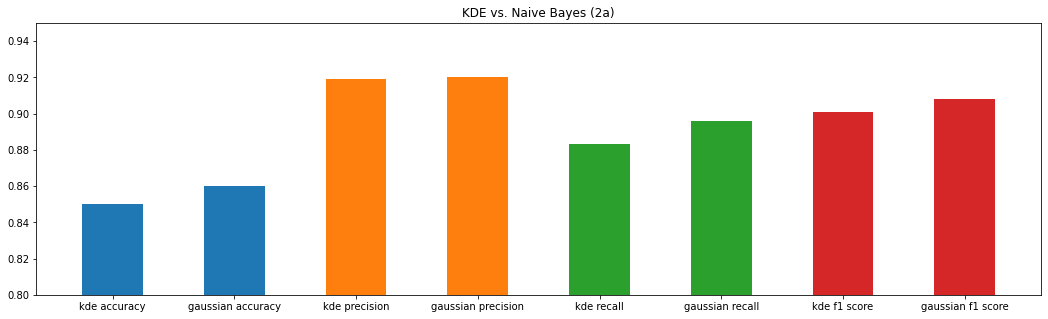

In [41]:
import matplotlib.pyplot as plt
# now print graph comparing the KDE and Naive Bayes, increase bar chart size to include all bar plot
# and their name
plt.figure(figsize=(18, 5)) 
plt.bar(['kde accuracy', 'gaussian accuracy'],[accuracy_k,accuracy], width=0.5)
plt.bar(['kde precision', 'gaussian precision'],[precision_k,precision], width=0.5)
plt.bar(['kde recall', 'gaussian recall'],[recall_k,recall], width=0.5)
plt.bar(['kde f1 score', 'gaussian f1 score'],[f_score_k,f_score], width=0.5)
# limit the y axis from 0.8 to 1 to better show the data
plt.title('KDE vs. Naive Bayes (2a)')
plt.ylim([0.8, 0.95])

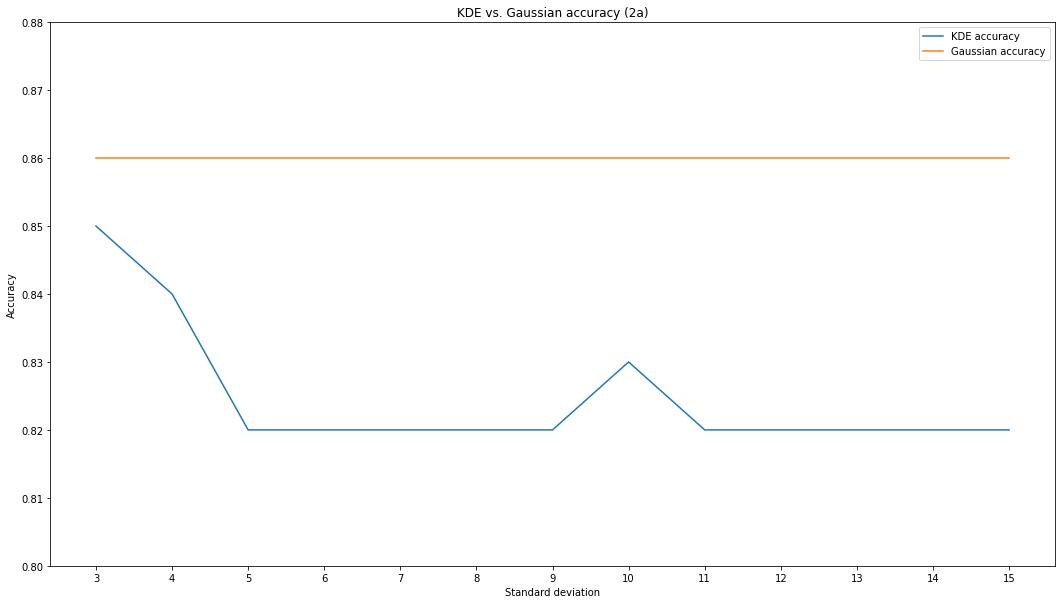

In [42]:
# print graph of KDE vs Gaussian distribution, with all standard deviation of KDE from 3 to 1
gau_accuracy = [accuracy]*len(accuracy_kde)

# create sd list from 3 to 15
lst = list(range(3,16))
# adjust size of graph for better view
plt.figure(figsize=(18, 10)) 
plt.plot(lst,accuracy_kde, label = "KDE accuracy")
plt.plot(lst,gau_accuracy, label = "Gaussian accuracy")
plt.title('KDE vs. Gaussian accuracy (2a)')
plt.ylabel('Accuracy')
plt.xlabel('Standard deviation')
plt.ylim([0.8, 0.88])
plt.xticks(lst)
plt.legend()
plt.show()


(0.65, 0.95)

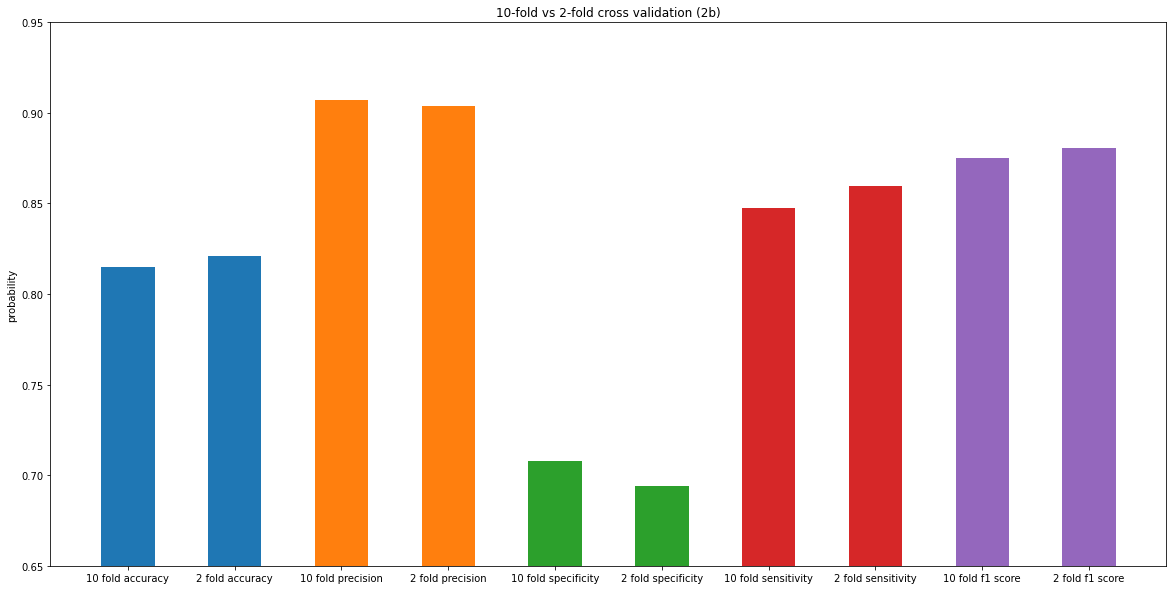

In [43]:
# now print graph comparing the two cross validation, increase bar chart size to include all bar 
# plot and their name (2b)
plt.figure(figsize=(20, 10)) 
plt.bar(['10 fold accuracy', '2 fold accuracy'],[total_accuracy_10/10,total_accuracy_2/2], width=0.5)
plt.bar(['10 fold precision', '2 fold precision'],[total_precision_10/10,total_precision_2/2], width=0.5)
plt.bar(['10 fold specificity', '2 fold specificity'],[total_specificity_10/10,total_specificity_2/2], width=0.5)
plt.bar(['10 fold sensitivity', '2 fold sensitivity'],[total_sensitivity_10/10,total_sensitivity_2/2], width=0.5)
plt.bar(['10 fold f1 score', '2 fold f1 score'],[total_fscore_10/10,total_fscore_2/2], width=0.5)
# limit the y axis from 0.8 to 1 to better show the data
plt.title('10-fold vs 2-fold cross validation (2b)')
plt.ylabel('probability')
plt.ylim([0.65, 0.95])

2a:

KDE's accuracies are all lower than gaussian when 𝜎 is increased from 3 to 15, using the same training set. When 𝜎 is 3, KDE obtains the highest accuracy of 85% compared to 86% for Gaussian, and data of KDE (𝜎=3) is used to compare with Gaussian. The precision of KDE is slightly lower than Gaussian's precision. KDE's recall/sensitivity is much lower than Gaussian, meaning that it predicts a lower proportion of true positives using the same training data (<=50K), suggesting that KDE requires more data for positive prediction to obtain a more accurate positive prediction. 

Numeric data in this dataset are age, number of years of education and working hour, data from these three attributes are presumedly from the population. With a sample size of 1000 (900 training) and central limit theorem, the numeric attribute are expected to follow a Gaussian distribution. 

When evaluating a model, we prefer the model that is high in both precision and recall/sensitivity, and f1 score is used to determine which of the model is better. Since Gaussian naïve bayes obtains higher f1 score and accuracy (higher than all accepted KDE standard deviation range) while the data is also follow Gaussian distribution, then Gaussian naïve bayes would be the better model for class prediction for this dataset. 

2b:

The increased m in m-fold cross validation increases partitions of the data, training size is also increased. With more training data, the model can obtain more information about the dataset, covering more potential observable instance in the test data from the partitions, hence expected to obtain more accurate prediction. 
However, different scenario is observed in 10- and 2-fold cross validation for this dataset. 10-fold CV's average accuracy is 0.815, where 2-fold CV's accuracy is 0.821. 

A reason for this unusual data is that the dataset we used is unbalanced, the model will be biased towards the majority class(<=50k) since prior of majority class is much higher. We could see that from the graph, where sensitivity is much higher than specificity. 

10-fold’s precision is higher than 2-fold, and 2-fold predicts a higher proportion of True positive as it has a higher sensitivity. This suggest that 10-fold is more accurate when predicting positive (<=50k), even though proportion of TP predicted is less than 2-fold. 10-fold CV’s specificity is also higher than 2-fold, meaning that it is more accurate in predicting true negative (>50k). From this we can conclude that, even though 2-fold CV’s accuracy is higher than 10-fold, its accuracy is based on the biased model. 10-fold CV is also influenced by the biased prior, however it is a more reliable model since it studies more training data (900 compare to 500). Thus, as m in m-fold cross validation increases, accuracy obtained by the model may reduce, but the model becomes more reliable.


### Q3 [4 marks]
In `train()`, you are asked to treat the missing value of nominal attributes as a new category. There is another option (as suggested in Thu lecture in week 2): <u>ignoring the missing values</u>. 
Compare the two methods in both large and small datasets. Comment and explain your observations.
You can extract the first 50 records to construct a small dataset.Use Gaussian Naive Bayes only for this question.

Provide your text answer of 150-200 words in this cell.

### Q4 [4 marks]
In week 4, we have learned how to obtain information gain (IG) and gain ratio (GR) to choose an attribute to split a node in a decision tree. We will see how to apply them in the Naive Bayes classification.

(a) Compute the GR of each attribute $X_i$, relative to the class distribution. In the Na\"ive Bayes classifier, remove attributes in the ascending order of GR: first, remove $P(X_i|c_j)$ such that $X_i$ has the least GR; second, remove $P(X_{i'}|c_j)$ such that $X_{i'}$ has the second least GR,......, until there is only one $X_{i*}$ with the largest GR remaining in the maximand $P(c_j) P(X_{i^*} | c_j)$. Observe the <u>change of the accuracy for both Gaussian and KDE</u> (Choose bandwidth $\sigma=10$ for KDE).

(b) Compute the IG between each pair of attributes. Describe and explain your observations. Choose an attribute and implement an estimator to predict the value of `education num`. Explain why you choose this attribute. Enumerate two other examples that an attribute can be used to estimate the other and explain the reason.  

In [86]:
# Write additional code here, if necessary (you may insert additional code cells)

### (a)

Provide your text answer to **Question 4.a** of 100-150 words in this cell.

### (b)

Provide your text answer to **Question 4.b** of 150-200 words in this cell.

<b>Authorship Declaration</b>:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University of Melbourne Academic Honesty Policy, as described
   at https://academicintegrity.unimelb.edu.au.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.

   <b>Signed by</b>: Aobo Li, Student ID:1172339
   
   <b>Dated</b>: 2022.4.7